In [1]:
import numpy as np
import re 
import nltk
import pandas as pd

In [5]:
text1 = open("/Users/savita/Desktop/computeCost.txt","r") 
file_contents1 = text1.read()

In [6]:
file_contents1

'function J = computeCost(X, y, theta)\n%COMPUTECOST Compute cost for linear regression\n%   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the\n%   parameter for linear regression to fit the data points in X and y\n\n% Initialize some useful values\nm = length(X); % number of training examples\n% ====================== YOUR CODE HERE ======================\n% Instructions: Compute the cost of a particular choice of theta\n%               You should set J to the cost.\nJ = 0;\nJ=1/(2*m)*(sum(((X*theta)-y).^2));\n% =========================================================================\nend\n\n\nfunction plotData(x, y)\n%PLOTDATA Plots the data points x and y into a new figure \n%   PLOTDATA(x,y) plots the data points and gives the figure axes labels of\n%   population and profit.\n\nfigure; % open a new figure window\n\n% ====================== YOUR CODE HERE ======================\n% Instructions: Plot the training data into a figure using the \n%               "fi

In [7]:

clean_text1 = re.sub(r'%(.*)\n','',file_contents1)
clean_text1 = re.sub(r'\s+',' ',clean_text1)

In [8]:
clean_text1

"function J = computeCost(X, y, theta) m = length(X); J = 0; J=1/(2*m)*(sum(((X*theta)-y).^2)); end function plotData(x, y) figure; plot(x,y,'rx','MarkerSize',10); xlabel('x-values'); ylabel('y-values'); end function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters) m = length(X); J_history = zeros(num_iters, 1); for iter = 1:num_iters dell=(1/m)*((X*theta-y)' * X)'; theta = theta - (alpha * dell); J_history(iter) = computeCost(X, y, theta); end end"

In [10]:
words = nltk.word_tokenize(clean_text1)
words

['function',
 'J',
 '=',
 'computeCost',
 '(',
 'X',
 ',',
 'y',
 ',',
 'theta',
 ')',
 'm',
 '=',
 'length',
 '(',
 'X',
 ')',
 ';',
 'J',
 '=',
 '0',
 ';',
 'J=1/',
 '(',
 '2*m',
 ')',
 '*',
 '(',
 'sum',
 '(',
 '(',
 '(',
 'X*theta',
 ')',
 '-y',
 ')',
 '.^2',
 ')',
 ')',
 ';',
 'end',
 'function',
 'plotData',
 '(',
 'x',
 ',',
 'y',
 ')',
 'figure',
 ';',
 'plot',
 '(',
 'x',
 ',',
 'y',
 ',',
 "'rx",
 "'",
 ',',
 "'MarkerSize',10",
 ')',
 ';',
 'xlabel',
 '(',
 "'x-values",
 "'",
 ')',
 ';',
 'ylabel',
 '(',
 "'y-values",
 "'",
 ')',
 ';',
 'end',
 'function',
 '[',
 'theta',
 ',',
 'J_history',
 ']',
 '=',
 'gradientDescent',
 '(',
 'X',
 ',',
 'y',
 ',',
 'theta',
 ',',
 'alpha',
 ',',
 'num_iters',
 ')',
 'm',
 '=',
 'length',
 '(',
 'X',
 ')',
 ';',
 'J_history',
 '=',
 'zeros',
 '(',
 'num_iters',
 ',',
 '1',
 ')',
 ';',
 'for',
 'iter',
 '=',
 '1',
 ':',
 'num_iters',
 'dell=',
 '(',
 '1/m',
 ')',
 '*',
 '(',
 '(',
 'X*theta-y',
 ')',
 "'",
 '*',
 'X',
 ')',
 "'",
 ';',
 't

In [11]:
# print some stats about this word data
print("Total words in text: {}".format(len(words)))
print("Unique words: {}".format(len(set(words)))) # `set` removes any duplicate words

Total words in text: 157
Unique words: 49


In [15]:
from collections import Counter

def preprocess(text):

    # Replace punctuation with tokens so we can use them in our model
    text = text.lower()
    text = text.replace('.', ' <PERIOD> ')
    text = text.replace(',', ' <COMMA> ')
    text = text.replace('"', ' <QUOTATION_MARK> ')
    text = text.replace(';', ' <SEMICOLON> ')
    text = text.replace('!', ' <EXCLAMATION_MARK> ')
    text = text.replace('?', ' <QUESTION_MARK> ')
    text = text.replace('(', ' <LEFT_PAREN> ')
    text = text.replace(')', ' <RIGHT_PAREN> ')
    text = text.replace('--', ' <HYPHENS> ')
    text = text.replace('?', ' <QUESTION_MARK> ')
    text = text.replace('\n', ' <NEW_LINE> ')
    text = text.replace(':', ' <COLON> ')
    words = text.split()
    
    # Remove all words with  5 or fewer occurences
    word_counts = Counter(words)
    trimmed_words = [word for word in words if word_counts[word] > 5]

    return trimmed_words


def create_lookup_tables(words):
    """
    Create lookup tables for vocabulary
    :param words: Input list of words
    :return: Two dictionaries, vocab_to_int, int_to_vocab
    """
    word_counts = Counter(words)
    # sorting the words from most to least frequent in text occurrence
    sorted_vocab = sorted(word_counts, key=word_counts.get, reverse=True)
    # create int_to_vocab dictionaries
    int_to_vocab = {ii: word for ii, word in enumerate(sorted_vocab)}
    vocab_to_int = {word: ii for ii, word in int_to_vocab.items()}

    return vocab_to_int, int_to_vocab

In [33]:
vocab_to_int, int_to_vocab = create_lookup_tables(words)
int_words = [vocab_to_int[word] for word in words]

print(len(int_words))

157


In [18]:
def get_target(words, idx, window_size=5):
    ''' Get a list of words in a window around an index. '''
    
    R = np.random.randint(1, window_size+1)
    start = idx - R if (idx - R) > 0 else 0
    stop = idx + R
    target_words = words[start:idx] + words[idx+1:stop+1]
    
    return list(target_words)

In [76]:
int_text = [i for i in range(10)]
print('Input: ', int_text)
idx=5 # word index of interest

target = get_target(int_text, idx=idx, window_size=5)
print('Target: ', target)  

Input:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Target:  [1, 2, 3, 4, 6, 7, 8, 9]


In [20]:

def get_batches(words, batch_size, window_size=5):
    ''' Create a generator of word batches as a tuple (inputs, targets) '''
    
    n_batches = len(words)//batch_size
    
    # only full batches
    words = words[:n_batches*batch_size]
    
    for idx in range(0, len(words), batch_size):
        x, y = [], []
        batch = words[idx:idx+batch_size]
        for ii in range(len(batch)):
            batch_x = batch[ii]
            batch_y = get_target(batch, ii, window_size)
            y.extend(batch_y)
            x.extend([batch_x]*len(batch_y))
        yield x, y

In [21]:
int_text = [i for i in range(20)]
x,y = next(get_batches(int_text, batch_size=4, window_size=5))

print('x\n', x)
print('y\n', y)

x
 [0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
y
 [1, 0, 2, 3, 0, 1, 3, 0, 1, 2]


In [57]:
import random
def cosine_similarity(embedding, valid_size=4, valid_window=10):
    """ Returns the cosine similarity of validation words with words in the embedding matrix.
        Here, embedding should be a PyTorch embedding module.
    """
    
    # Here we're calculating the cosine similarity between some random words and 
    # our embedding vectors. With the similarities, we can look at what words are
    # close to our random words.
    
    # sim = (a . b) / |a||b|
    
    embed_vectors = embedding.weight
    
    # magnitude of embedding vectors, |b|
    magnitudes = embed_vectors.pow(2).sum(dim=1).sqrt().unsqueeze(0)
    
    # pick N words from our ranges (0,window) and (10,10+window). lower id implies more frequent 
    valid_examples = np.array(random.sample(range(valid_window), valid_size//2))
    valid_examples = np.append(valid_examples,random.sample(range(10,10+valid_window), valid_size//2))
    valid_examples = torch.LongTensor(valid_examples)
    
    valid_vectors = embedding(valid_examples)
    similarities = torch.mm(valid_vectors, embed_vectors.t())/magnitudes
        
    return valid_examples, similarities

In [23]:
import torch
from torch import nn
import torch.optim as optim

In [24]:
class SkipGram(nn.Module):
    def __init__(self, n_vocab, n_embed):
        super().__init__()
        
        self.embed = nn.Embedding(n_vocab, n_embed)
        self.output = nn.Linear(n_embed, n_vocab)
        self.log_softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        x = self.embed(x)
        scores = self.output(x)
        log_ps = self.log_softmax(scores)
        
        return log_ps

In [38]:
int_words

[11,
 14,
 4,
 15,
 0,
 5,
 2,
 7,
 2,
 6,
 1,
 16,
 4,
 17,
 0,
 5,
 1,
 3,
 14,
 4,
 22,
 3,
 23,
 0,
 24,
 1,
 9,
 0,
 25,
 0,
 0,
 0,
 26,
 1,
 27,
 1,
 28,
 1,
 1,
 3,
 10,
 11,
 29,
 0,
 18,
 2,
 7,
 1,
 30,
 3,
 31,
 0,
 18,
 2,
 7,
 2,
 32,
 8,
 2,
 33,
 1,
 3,
 34,
 0,
 35,
 8,
 1,
 3,
 36,
 0,
 37,
 8,
 1,
 3,
 10,
 11,
 38,
 6,
 2,
 12,
 39,
 4,
 40,
 0,
 5,
 2,
 7,
 2,
 6,
 2,
 19,
 2,
 13,
 1,
 16,
 4,
 17,
 0,
 5,
 1,
 3,
 12,
 4,
 41,
 0,
 13,
 2,
 20,
 1,
 3,
 42,
 21,
 4,
 20,
 43,
 13,
 44,
 0,
 45,
 1,
 9,
 0,
 0,
 46,
 1,
 8,
 9,
 5,
 1,
 8,
 3,
 6,
 4,
 6,
 47,
 0,
 19,
 9,
 48,
 1,
 3,
 12,
 0,
 21,
 1,
 4,
 15,
 0,
 5,
 2,
 7,
 2,
 6,
 1,
 3,
 10,
 10]

In [62]:
embedding_dim= 10 #change
model = SkipGram(len(vocab_to_int), embedding_dim)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

print_every = 5
steps = 0
epochs = 5

# train for some number of epochs
for e in range(epochs):
    
    # get input and target batches
    for inputs, targets in get_batches(int_words, 10):
        steps += 1
        inputs, targets = torch.LongTensor(inputs), torch.LongTensor(targets)
        
        log_ps = model(inputs)
        loss = criterion(log_ps, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if steps % print_every == 0:                  
            # getting examples and similarities      
            valid_examples, valid_similarities = cosine_similarity(model.embed)
            _, closest_idxs = valid_similarities.topk(10) # topk highest similarities
            
            valid_examples, closest_idxs = valid_examples.to('cpu'), closest_idxs.to('cpu')
            for ii, valid_idx in enumerate(valid_examples):
                closest_words = [int_to_vocab[idx.item()] for idx in closest_idxs[ii]][1:]
                print(int_to_vocab[valid_idx.item()] + " | " + ', '.join(closest_words))
            print("...")

' | dell, m, 2*m, 'y-values, J_history, iter, 1, ], -
theta | (, X*theta-y, -, iter, ], ', length, J, x
length | alpha, x, gradientDescent, ,, .^2, [, J=1/, *, zeros
function | for, -y, ;, plotData, X, sum, 1, y, plot
...
) | :, *, J, =, iter, y, length, ;, num_iters
; | num_iters, plotData, end, function, -y, for, 'MarkerSize',10, X*theta, plot
end | ;, for, num_iters, *, plot, 'y-values, 'MarkerSize',10, .^2, plotData
x | [, length, dell=, J, 0, zeros, J=1/, *, ylabel
...
; | num_iters, plotData, end, function, -y, for, 'MarkerSize',10, X*theta, plot
' | dell, m, 2*m, 'y-values, iter, J_history, 1, ], -
function | for, -y, ;, plotData, X, sum, 1, y, plot
end | ;, for, num_iters, *, plot, 'y-values, 'MarkerSize',10, .^2, plotData
...
= | y, J, for, ), dell=, function, [, -y, 1
; | num_iters, plotData, end, function, -y, for, 'MarkerSize',10, X*theta, plot
x | [, length, dell=, J, 0, zeros, J=1/, *, ylabel
J_history | ], y, 1, ', X*theta, 2*m, 'x-values, sum, iter
...
X | 0, computeCos

In [63]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [64]:
# getting embeddings from the embedding layer of our model, by name
embeddings = model.embed.weight.data.numpy()


In [65]:
viz_words = 49
tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings[:viz_words, :])

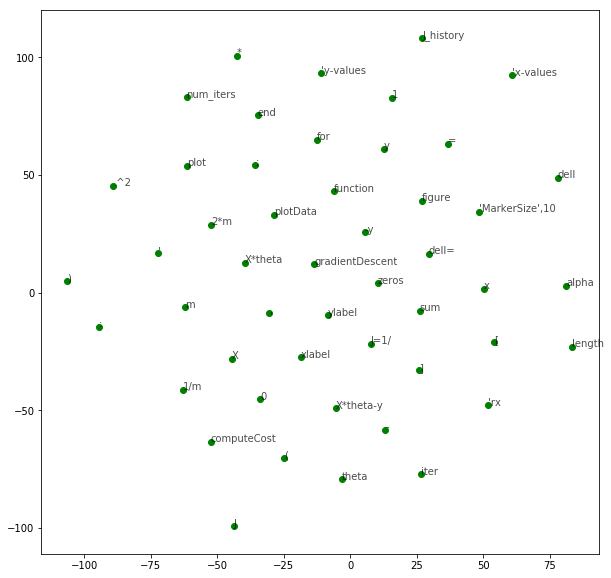

In [81]:
fig, ax = plt.subplots(figsize=(10, 10))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='green')
    plt.annotate(int_to_vocab[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

In [59]:
embeddings

array([[ 1.80546379e+00, -9.00213480e-01,  9.09346461e-01,
        -1.91489267e+00, -1.99725404e-01,  4.39329892e-01,
         9.17826951e-01, -6.59476280e-01,  1.15143991e+00,
         3.88973981e-01],
       [-1.01758409e+00, -7.88062334e-01, -1.63952816e+00,
        -1.02467227e+00, -1.59895286e-01,  5.11408269e-01,
         1.69364110e-01,  5.81069946e-01, -2.59137303e-01,
         1.66950488e+00],
       [ 1.03105195e-01, -6.83049679e-01, -7.45564461e-01,
         4.66781437e-01,  1.55189347e+00, -5.45668006e-01,
        -3.47683281e-01, -1.47559595e+00,  1.05594385e+00,
        -1.93945706e-01],
       [-7.09247768e-01, -6.52522445e-01, -1.14431596e+00,
        -6.96879923e-01, -4.10652518e-01,  5.55199087e-01,
        -2.15772629e+00, -5.88433564e-01, -6.92677081e-01,
        -5.09123445e-01],
       [ 5.84614754e-01,  7.42961913e-02,  1.45808494e+00,
        -3.21177006e-01, -2.99197566e-02,  3.80562633e-01,
        -2.18275452e+00, -1.05370677e+00,  7.08050251e-01,
         1.

In [69]:
model

SkipGram(
  (embed): Embedding(49, 10)
  (output): Linear(in_features=10, out_features=49, bias=True)
  (log_softmax): LogSoftmax()
)

In [71]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 SkipGram(
  (embed): Embedding(49, 10)
  (output): Linear(in_features=10, out_features=49, bias=True)
  (log_softmax): LogSoftmax()
) 

The state dict keys: 

 odict_keys(['embed.weight', 'output.weight', 'output.bias'])


In [72]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [73]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['embed.weight', 'output.weight', 'output.bias'])


In [74]:
model.load_state_dict(state_dict)

In [77]:
model.load_state_dict

<bound method Module.load_state_dict of SkipGram(
  (embed): Embedding(49, 10)
  (output): Linear(in_features=10, out_features=49, bias=True)
  (log_softmax): LogSoftmax()
)>

In [78]:
doc1 = "function J = computeCost(X, y, theta) s = length(X); J = 0; J =1/(2*m)*(sum(((X*theta)-y))); end"

In [79]:
doc2 = "function J = computeCost(X, y, theta) m = length(X); J = 0; J=1/(2*m)*(sum(((X*theta)-y).^2)); end"